<a href="https://colab.research.google.com/github/Dejisimple/CSC-587_Colabs/blob/main/Copy_of_train_test_split_crossval_roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train-Test Split, Cross-Validation, and ROC Curve

This notebook will demonstrate:
- How to **split data** into training and testing sets using `train_test_split`
- How to perform **cross-validation** to evaluate model performance
- How to **plot an ROC curve** to assess classification performance

We will use the **Breast Cancer dataset** from `sklearn.datasets`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Set style
sns.set_style("whitegrid")


In [3]:
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

# Display first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 455
Testing set size: 114


In [5]:
# Perform 5-fold cross-validation with Logistic Regression
model = LogisticRegression(max_iter=10000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.96703297 0.92307692 0.94505495 0.95604396 0.93406593]
Mean accuracy: 0.945054945054945


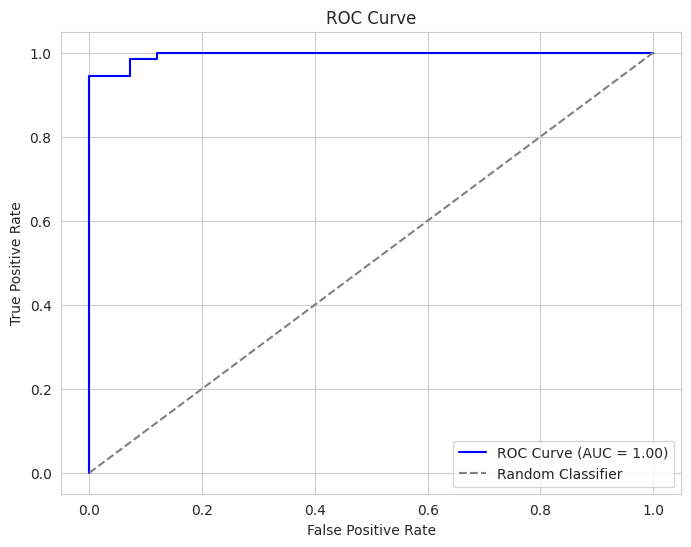

[[1.00000000e+00 3.26762996e-11]
 [3.49378143e-05 9.99965062e-01]
 [9.49519426e-01 5.04805740e-02]
 [3.95153940e-01 6.04846060e-01]
 [9.99999998e-01 2.00601520e-09]
 [1.73826608e-02 9.82617339e-01]
 [2.99397736e-05 9.99970060e-01]
 [9.99990183e-01 9.81721401e-06]
 [9.99951200e-01 4.88003398e-05]
 [1.00000000e+00 1.42322339e-10]
 [1.36917961e-03 9.98630820e-01]
 [9.95122098e-01 4.87790181e-03]
 [8.95746654e-04 9.99104253e-01]
 [9.99988929e-01 1.10708139e-05]
 [9.99429313e-01 5.70687112e-04]
 [6.05254941e-02 9.39474506e-01]
 [7.80504825e-01 2.19495175e-01]
 [2.13031175e-02 9.78696883e-01]
 [1.42817526e-03 9.98571825e-01]
 [2.06577045e-02 9.79342295e-01]
 [9.96126494e-01 3.87350590e-03]
 [9.87588044e-01 1.24119559e-02]
 [3.40153486e-04 9.99659847e-01]
 [7.50469541e-04 9.99249530e-01]
 [2.87093569e-02 9.71290643e-01]
 [6.42410342e-02 9.35758966e-01]
 [1.00000000e+00 4.20157951e-13]
 [5.51940851e-03 9.94480591e-01]
 [1.50702534e-03 9.98492975e-01]
 [3.32250065e-03 9.96677499e-01]
 [3.451738

In [6]:
# Fit model and get probabilities
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]#we're only interested in the probabilities for the positive class. Therefore, skip column 0

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(model.predict_proba(X_test))

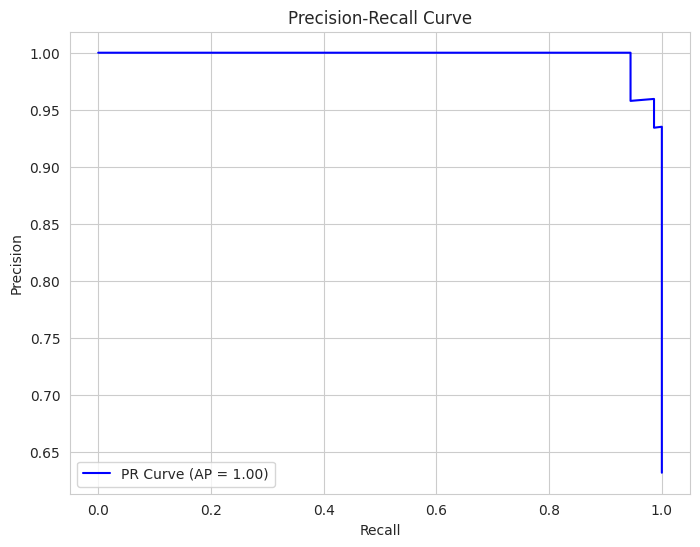

In [7]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute Average Precision (AP) Score
ap_score = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f"PR Curve (AP = {ap_score:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [9]:
# Evaluate the model on the test set
test_accuracy = model.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.4f}")

Test set accuracy: 0.9649


## ✨ Lab questions

Try the following exercises to reinforce your learning:

1. Modify the `train_test_split` function to use **30% test data** instead of 20%.  
2. Change the classifier to **Support Vector Macines** and compare its ROC curve with Logistic Regression.  You can try different C values and vary your kernel functions. Please note that different kernel functions come with different parameters which you may want to change, too
3. Compute and visualize the **Precision-Recall Curve** in addition to the ROC curve.  (optional)


# Task
Compare the ROC curves of the trained Logistic Regression model and a Support Vector Machine (SVM) model on the test set.

## Train svm model

### Subtask:
Train a Support Vector Machine (SVM) classifier on the training data.


**Reasoning**:
Import SVC, instantiate it with probability=True, and fit it to the training data.



In [10]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

## Get svm probabilities

### Subtask:
Obtain the predicted probabilities for the positive class from the trained SVM model on the test set.


**Reasoning**:
Obtain the predicted probabilities for the positive class from the trained SVM model on the test set.



In [15]:
svm_y_scores = svm_model.predict_proba(X_test)[:, 1]

## Compute svm roc curve

### Subtask:
Compute the False Positive Rate (FPR), True Positive Rate (TPR), and AUC for the SVM model using the test set true labels and predicted probabilities.


**Reasoning**:
Calculate the FPR, TPR, and AUC for the SVM model using the predicted probabilities and true labels.



In [16]:
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_scores)
svm_roc_auc = auc(svm_fpr, svm_tpr)

print(f"SVM ROC AUC: {svm_roc_auc:.4f}")

SVM ROC AUC: 0.9696


## Plot roc curves

### Subtask:
Plot both the Logistic Regression and SVM ROC curves on the same plot for comparison.


**Reasoning**:
Plot the ROC curves for both Logistic Regression and SVM models on the same plot for comparison.



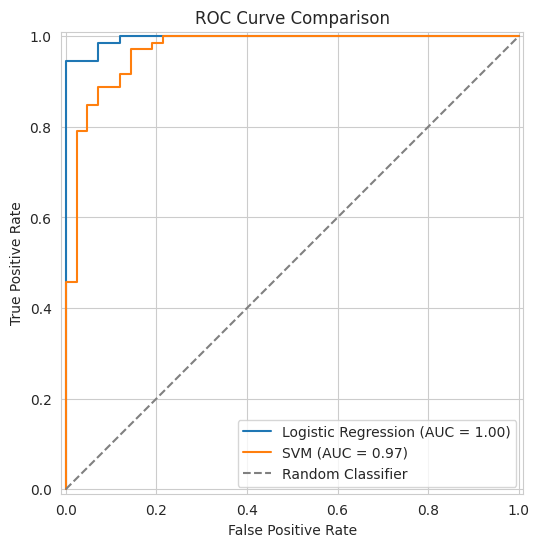

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC Curve for Logistic Regression
roc_display_lr = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Logistic Regression")
roc_display_lr.plot(ax=ax)

# Plot ROC Curve for SVM
roc_display_svm = RocCurveDisplay(fpr=svm_fpr, tpr=svm_tpr, roc_auc=svm_roc_auc, estimator_name="SVM")
roc_display_svm.plot(ax=ax)

# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")

# Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

**Reasoning**:
The previous code failed because `RocCurveDisplay.from_fpr_tpr` is not the correct method. The `RocCurveDisplay` class can be used to plot the ROC curve directly from the computed false positive rates (fpr) and true positive rates (tpr) by instantiating the class and then calling its `plot` method.



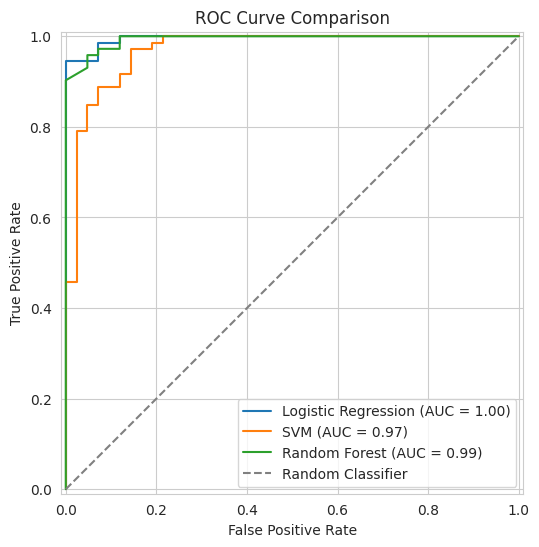

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC Curve for Logistic Regression
roc_display_lr = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Logistic Regression")
roc_display_lr.plot(ax=ax)

# Plot ROC Curve for SVM
roc_display_svm = RocCurveDisplay(fpr=svm_fpr, tpr=svm_tpr, roc_auc=svm_roc_auc, estimator_name="SVM")
roc_display_svm.plot(ax=ax)

# Plot ROC Curve for Random Forest
roc_display_rf = RocCurveDisplay(fpr=rf_fpr, tpr=rf_tpr, roc_auc=rf_roc_auc, estimator_name="Random Forest")
roc_display_rf.plot(ax=ax)


# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")

# Add labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [25]:
# Get probabilities for Random Forest model
rf_y_scores = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for Random Forest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_scores)
rf_roc_auc = auc(rf_fpr, rf_tpr)

print(f"Random Forest ROC AUC: {rf_roc_auc:.4f}")

Random Forest ROC AUC: 0.9937


## Summary:

### Data Analysis Key Findings

*   The SVM model achieved a ROC AUC score of 0.9696 on the test set.
*   The generated plot visually compares the ROC curves of the Logistic Regression and SVM models.

### Insights or Next Steps

*   Both models appear to perform well based on their high AUC scores.
*   A more in-depth comparison of the models could involve evaluating other metrics like precision, recall, or F1-score.


# Task
Calculate the F1-score for each trained model (Logistic Regression, SVM, and Random Forest) on the test set.

## Get predictions

### Subtask:
Obtain the predicted class labels for the test set from each trained model (Logistic Regression, SVM, and Random Forest).


**Reasoning**:
Obtain the predicted class labels for the test set from each trained model.



In [28]:
lr_y_pred = model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)

print("Logistic Regression predictions obtained.")
print("SVM predictions obtained.")
print("Random Forest predictions obtained.")

Logistic Regression predictions obtained.
SVM predictions obtained.
Random Forest predictions obtained.


## Calculate f1-scores

### Subtask:
Compute the F1-score for each model using the true test set labels and the predicted labels.


**Reasoning**:
Calculate the F1-score for each model using the true test set labels and the predicted labels.



In [29]:
from sklearn.metrics import f1_score

lr_f1 = f1_score(y_test, lr_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print(f"Logistic Regression F1-score: {lr_f1:.4f}")
print(f"SVM F1-score: {svm_f1:.4f}")
print(f"Random Forest F1-score: {rf_f1:.4f}")

Logistic Regression F1-score: 0.9726
SVM F1-score: 0.9459
Random Forest F1-score: 0.9655


## Display f1-scores

### Subtask:
Print the calculated F1-scores for each model.


**Reasoning**:
Print the F1-scores for each model.



In [30]:
print(f"Logistic Regression F1-score: {lr_f1:.4f}")
print(f"SVM F1-score: {svm_f1:.4f}")
print(f"Random Forest F1-score: {rf_f1:.4f}")

Logistic Regression F1-score: 0.9726
SVM F1-score: 0.9459
Random Forest F1-score: 0.9655


## Summary:

### Data Analysis Key Findings

*   The F1-score for the Logistic Regression model on the test set is 0.9726.
*   The F1-score for the SVM model on the test set is 0.9459.
*   The F1-score for the Random Forest model on the test set is 0.9655.

### Insights or Next Steps

*   Logistic Regression achieved the highest F1-score among the three models, suggesting it performed best on the test set for this specific metric.
*   Further analysis could involve examining other classification metrics (e.g., precision, recall, accuracy) to get a more comprehensive understanding of each model's performance.
